Welcome to the Password Strength Checker!


Enter a password (or type 'done' to finish):  abc
Enter a password (or type 'done' to finish):  Test1234
Enter a password (or type 'done' to finish):  Password123!
Enter a password (or type 'done' to finish):  done



Password Analysis Summary:
        Password Strength                                             Issues
0           abc     Weak  Too short (less than 8 characters), Missing di...
1      Test1234   Medium                          Missing special character
2  Password123!   Strong                                               None


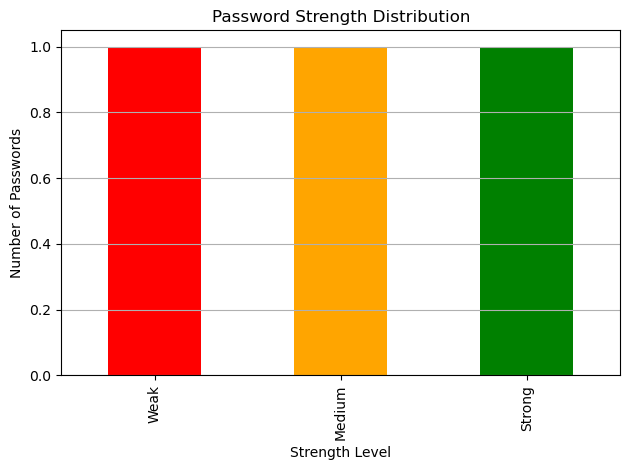

Analysis complete! Stay safe!


In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

class PasswordStrengthChecker:
    """
    Class to check password strength and analyze passwords.
    """

    def __init__(self):
        # List to store password data
        self.password_records = []

    def evaluate_password(self, password):
        """
        Check the strength of the password and return the strength and reasons.
        """
        strength = "Strong"
        reasons = []

        if len(password) < 8:
            strength = "Weak"
            reasons.append("Too short (less than 8 characters)")
        if not any(char.isdigit() for char in password):
            if strength == "Strong":
                strength = "Weak"
            reasons.append("Missing digit")
        if not any(char.isupper() for char in password):
            if strength == "Strong":
                strength = "Weak"
            reasons.append("Missing uppercase letter")
        if not any(char.islower() for char in password):
            if strength == "Strong":
                strength = "Weak"
            reasons.append("Missing lowercase letter")
        if not re.search(r'[!@#$%^&*(),.?":{}|<>]', password):
            # If password is already weak, keep it; else set to medium
            if strength == "Strong":
                strength = "Medium"
            reasons.append("Missing special character")
        if ' ' in password:
            if strength == "Strong":
                strength = "Weak"
            reasons.append("Contains space")

        return strength, reasons

    def add_password(self, password):
        """
        Evaluate and add password information to records.
        """
        try:
            strength, reasons = self.evaluate_password(password)
            self.password_records.append({
                "Password": password,
                "Strength": strength,
                "Issues": ", ".join(reasons) if reasons else "None"
            })
        except Exception as e:
            print(f"Error checking password '{password}': {e}")

    def show_analysis(self):
        """
        Print summary table and show a bar chart of strength distribution.
        """
        df = pd.DataFrame(self.password_records)
        print("\nPassword Analysis Summary:\n", df)

        strength_counts = df["Strength"].value_counts()
        strength_counts = strength_counts.reindex(["Weak", "Medium", "Strong"], fill_value=0)

        strength_counts.plot(kind='bar', color=['red', 'orange', 'green'])
        plt.title("Password Strength Distribution")
        plt.xlabel("Strength Level")
        plt.ylabel("Number of Passwords")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

def main():
    print("Welcome to the Password Strength Checker!")
    checker = PasswordStrengthChecker()

    while True:
        password = input("Enter a password (or type 'done' to finish): ")
        if password.lower() == 'done':
            break
        checker.add_password(password)

    checker.show_analysis()
    print("Analysis complete! Stay safe!")

if __name__ == "__main__":
    main()


In [ ]:
Password Strength Checker — Project Report
1. Objective
The primary objective of this project is to develop an efficient Python application that assesses the strength of passwords entered by users. 
By applying standard security criteria, the program identifies weaknesses such as insufficient length, missing digits, 
absence of uppercase/lowercase letters, lack of special characters, and presence of spaces. 
This enables users to receive immediate feedback and encourages the creation of more secure passwords, 
thereby enhancing personal and organizational cybersecurity.

2. Key Findings
Passwords that do not meet minimum length and character diversity requirements are vulnerable to compromise and are flagged as Weak.

Passwords that meet most criteria except for special characters are categorized as Medium, highlighting common gaps in user password habits.

Passwords fulfilling all security criteria are deemed Strong.

Visual analysis through bar charts provides a clear overview of password strength distribution among users, facilitating rapid assessment.

3. Topics Covered
Topic	Description
Python Fundamentals	Variables, data types, control structures (loops, conditionals), functions, and classes.
String Handling & Validation	Checking password length, character types, and regex for special characters.
Regular Expressions (Regex)	Pattern matching for detecting special characters in passwords.
Exception Handling	Managing errors gracefully during password evaluation.
Data Management with Pandas	Organizing and displaying password data in tabular form.
Data Visualization with Matplotlib	Creating bar charts to visualize password strength categories.
Object-Oriented Programming	Encapsulating functionality within classes for modular, reusable code.
User Interaction & Input	Handling user input and providing interactive console feedback.

4. Project Significance
Practical Application: The project addresses a crucial aspect of digital security, applicable to both individual users and organizations.

Comprehensive Skill Development: Integrates core programming concepts with data analytics and visualization, offering a well-rounded learning experience.

User Empowerment: Provides actionable insights into password weaknesses, promoting stronger security practices.

Extensibility: Designed with modularity, enabling future improvements like password strength meters, report generation, and integration with authentication systems.

Visual Feedback: Graphical representation simplifies understanding of password security trends, supporting informed decision-making.

5. Conclusion
This Password Strength Checker project effectively combines fundamental programming skills with cybersecurity principles and data analysis techniques. It serves as a practical and impactful project for beginners aiming to develop proficiency in Python, data handling, and security awareness. The modular structure and clear output facilitate user understanding and future scalability, making it an excellent portfolio project.

